In [1]:
# imports
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import random
from numpy import linalg as LA
from scipy.fftpack import dct
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
import copy
import qrcode

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import rcParams
rcParams['figure.dpi'] = 200

def load_data(num):
    img = mpimg.imread("qr/300W/01_Indoor/indoor_"+num+".png")
    text = open("qr/300W/01_Indoor/indoor_"+num+".pts", "r").read()
    return img,text

In [3]:
def set_pixel(img,x,y,val):
    img[x][y][0] = val
    img[x][y][1] = val
    img[x][y][2] = val

def process_img(data, img):
#     mpimg.imsave(address, final)
    qr_data = "" 
    img_points = copy.deepcopy(img)
    for line in data.splitlines()[3:-2]:
    #     print(line)
        qr_data += line[0:3] + line[8:11]
        x = int(line[8:11])
        y = int(line[0:3])
        set_pixel(img_points, x, y, 1)
        set_pixel(img_points, x+1, y+1, 1)
        set_pixel(img_points, x-1, y+1, 1)
        set_pixel(img_points, x-1, y-1, 1)
        set_pixel(img_points, x+1, y-1, 1)
    return qr_data, img_points

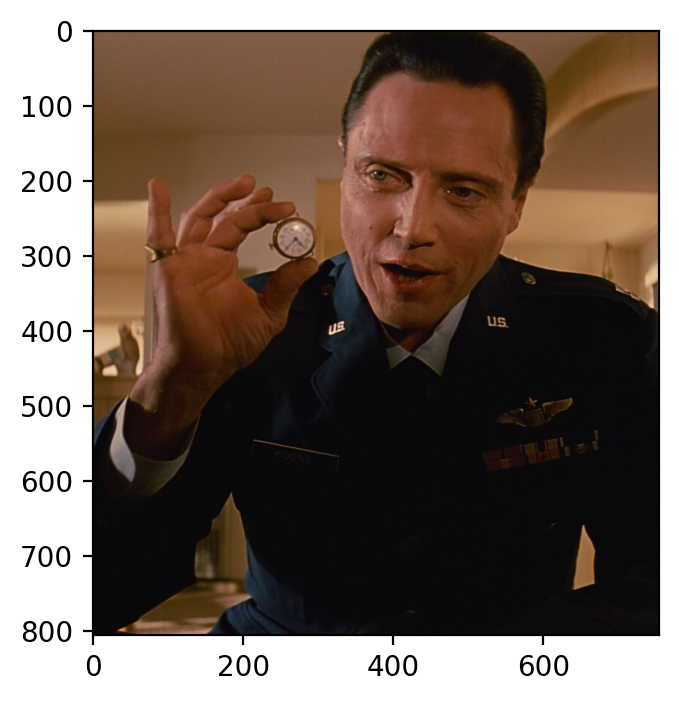

In [18]:
img, data = load_data("043")

plt.imshow(img)
mpimg.imsave("qr/initial.png", img)

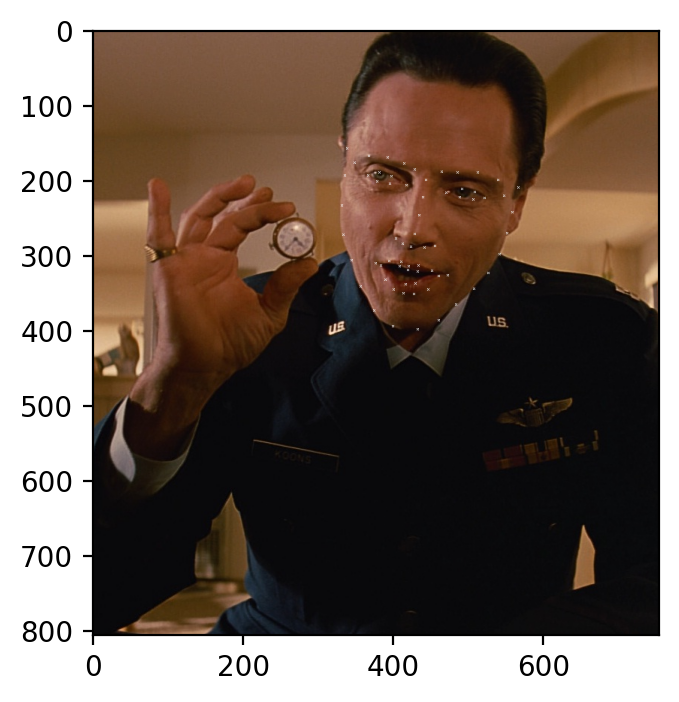

In [19]:

qr_data, points = process_img(data,img)
plt.imshow(points)
mpimg.imsave("qr/points.png", points)
# print(qr_data)

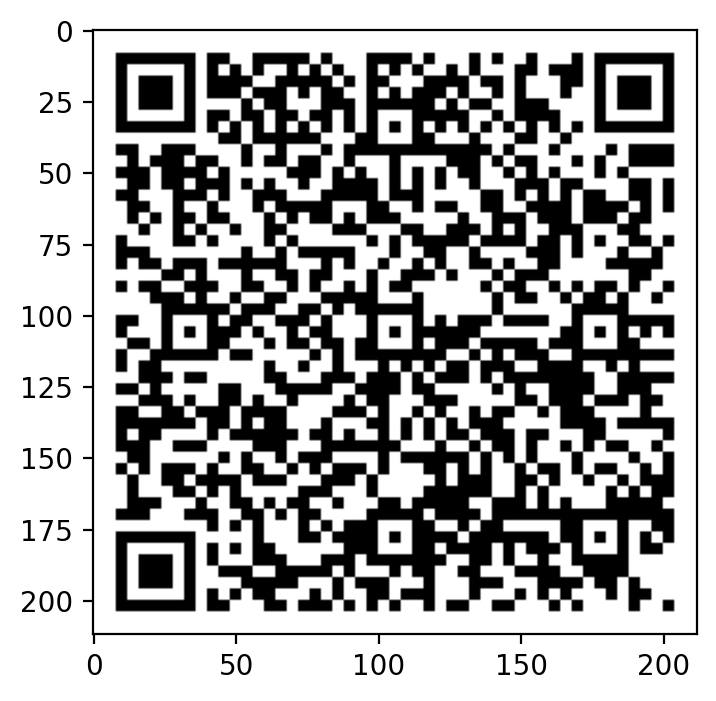

In [20]:
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=4,
    border=2,
)
qr.add_data(qr_data)
qr.make(fit=True)

qr_img = qr.make_image(fill_color="black", back_color="white")
plt.imshow(qr_img, cmap='gray')
mpimg.imsave("qr/qr.png", qr_img, cmap='gray')

0 255


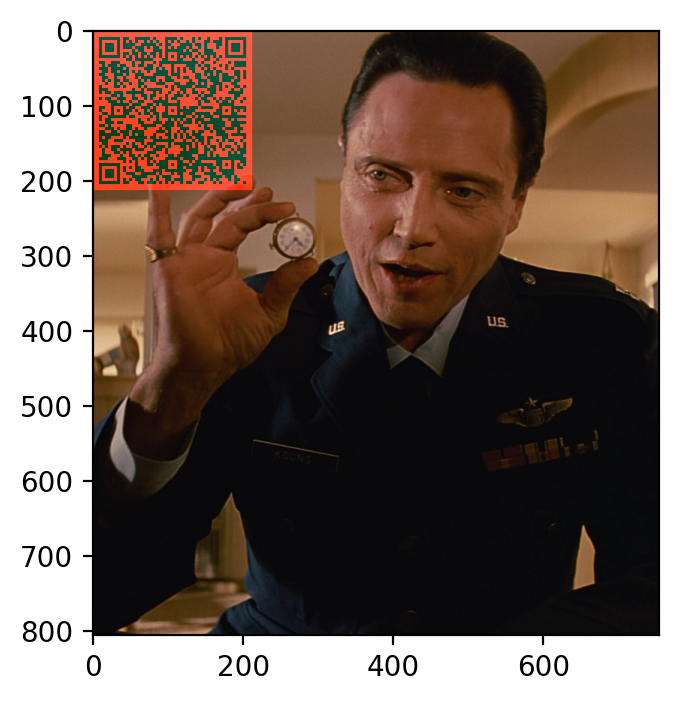

In [39]:
count = 8
img_res = copy.deepcopy((img*255).astype(int))
img_save = np.asarray(qr_img)

for i in range(len(img_save)):
    for j in range(len(img_save[i])):
        img_res[i][j][0] -= img_res[i][j][0]%(2**count)
#         img[i][j][1] -= img[i][j][1]%(2**count)
#         img[i][j][2] -= img[i][j][2]%(2**count)
        img_res[i][j][0] += int((2**count - 1)*img_save[i][j])
#         img[i][j][1] += int((2**count - 1)*img_save[i][j])
#         img[i][j][2] += int((2**count - 1)*img_save[i][j])
img_res = img_res.astype(np.uint8) 
plt.imshow(img_res)
print(img_res.min(), img_res.max())
mpimg.imsave("qr/qr_image1.png", img_res)

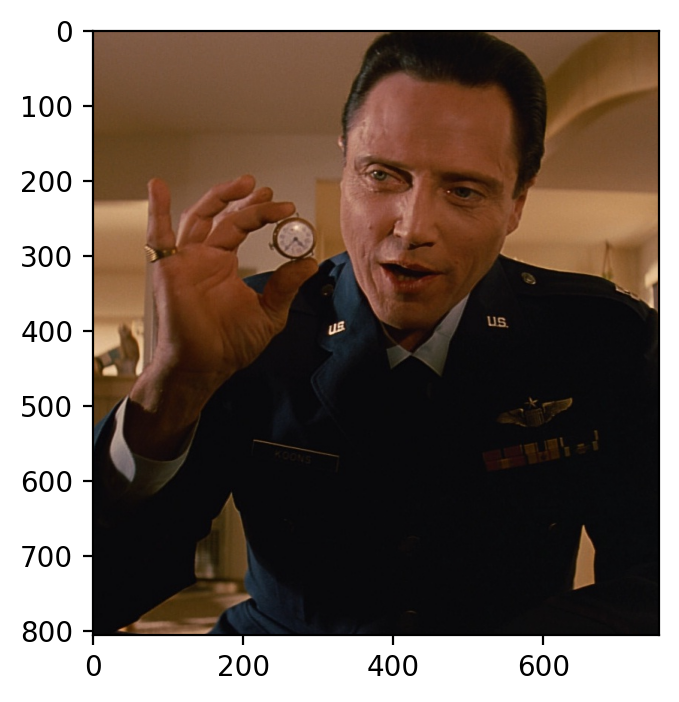

In [41]:
count = 1
img_res = copy.deepcopy((img*255).astype(int))
img_save = np.asarray(qr_img)

for i in range(len(img_save)):
    for j in range(len(img_save[i])):
        img_res[i][j][0] -= img_res[i][j][0]%(2**count)
#         img[i][j][1] -= img[i][j][1]%(2**count)
#         img[i][j][2] -= img[i][j][2]%(2**count)
        img_res[i][j][0] += int((2**count - 1)*img_save[i][j])
#         img[i][j][1] += int((2**count - 1)*img_save[i][j])
#         img[i][j][2] += int((2**count - 1)*img_save[i][j])
img_res = img_res.astype(np.uint8) 
plt.imshow(img_res)
mpimg.imsave("qr/qr_image2.png", img_res)

In [ ]:
count = 1
img_res = copy.deepcopy((img*255).astype(int))
img_save = np.asarray(qr_img)

for i in range(len(img_save)):
    for j in range(len(img_save[i])):
        img_res[i][j][0] -= img_res[i][j][0]%(2**count)
#         img[i][j][1] -= img[i][j][1]%(2**count)
#         img[i][j][2] -= img[i][j][2]%(2**count)
        img_res[i][j][0] += int((2**count - 1)*img_save[i][j])
#         img[i][j][1] += int((2**count - 1)*img_save[i][j])
#         img[i][j][2] += int((2**count - 1)*img_save[i][j])
img_res = img_res.astype(int) 
plt.imshow(img_res)
mpimg.imsave("qr/qr_image2.png", img_res)

In [50]:
import cv2

def scale(img, mult):
    res = resize(img, 1 / mult, anti_aliasing=False)*255
        
    return res.astype(int)

print(img.shape)

plt.imshow(scale(img,2))

ModuleNotFoundError: No module named 'cv2'